# R script for statistics 

## 1. Wilcoxon-Mann-whitney test 

    1. load data-set 1, Copy from clipboard

In [18]:
df1 <- read.delim("clipboard", header = F, stringsAsFactors = F)
head(df1)

V1,V2,V3
0.2823,13.03473,1
0.4756,10.56486,1
1.6979,10.58619,1
2.9793,12.95108,1
3.4470,11.40776,1
4.3775,37.19345,1


    2. load data-set 2, Copy from clipboard

In [17]:
df2 <- read.delim("clipboard", header = F, stringsAsFactors = F) 
head(df2)

V1,V2,V3
2.0572,10.36504,0
2.5935,13.51447,0
3.9757,10.08180,0
4.0993,20.12271,0
7.3003,10.70504,0
8.4286,13.55934,0


    3. Perform Wilcoxon-Mann-Whitney test 

In [20]:
w.result <- wilcox.test(df1$V2, df2$V2, paired = F)
w.result


	Wilcoxon rank sum test with continuity correction

data:  df1$V2 and df2$V2
W = 86855, p-value = 4.772e-16
alternative hypothesis: true location shift is not equal to 0


*****

## 2. Independent T-test

In [22]:
df1 <- read.delim("clipboard", header=F, stringsAsFactors = F)
dim(df1)
head(df1)

[1] 18  1

,V1
,<int>
1,330
2,450
3,940
4,860
5,680
6,820


In [23]:
df2 <- read.delim("clipboard", header=F, stringsAsFactors=F)
dim(df2)
head(df2)

[1] 14  1

,V1
,<int>
1,910
2,710
3,630
4,970
5,660
6,570


    to evaluate the sample variences of the two groups. If p-value is greater than 0.05, then two variences are homogeneous. In this case, student's t-test will be performed. If p-value is less than 0.05, Welch two sample t-test will be performed.  

In [24]:
var.result <- var.test(df1$V1, df2$V1) 
var.result


	F test to compare two variances

data:  df1$V1 and df2$V1
F = 1.8633, num df = 17, denom df = 13, p-value = 0.2598
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.6203092 5.1918159
sample estimates:
ratio of variances 
          1.863344 


    Perform t-test (paired, independent)

In [25]:
t.test <- if(var.result$p.value >= 0.05) {
    t.test(df1$V1, df2$V1, alternative = c("two.sided"), paired = F, var.equal = T)
    } else {
    t.test(df1$V1, df2$V1, alternative = c("two.sided"), paired = F, var.equal = F)
    }
t.test


	Two Sample t-test

data:  df1$V1 and df2$V1
t = -0.15155, df = 30, p-value = 0.8806
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -180.3770  155.4563
sample estimates:
mean of x mean of y 
 661.1111  673.5714 


*****

## 3. Two-sample Kolmogorov-Smirnov Test

    1. load data-set 1 from clipboard

In [2]:
df1 <- read.delim("clipboard", header = F, stringsAsFactors = F)
head(df1)

V1
0.032
0.029
0.032
0.032
0.033
0.032


    2. load data-set 2 from clipboard

In [6]:
df2 <-　read.delim("clipboard", header = F, stringsAsFactors = F)
head(df2)

V1
0.073
0.073
0.071
0.069
0.069
0.067


Perform two-sample KS test

In [9]:
ks.test(df1$V1, df2$V1)

Warning message in ks.test(df1$V1, df2$V1):
"p-value will be approximate in the presence of ties"


	Two-sample Kolmogorov-Smirnov test

data:  df1$V1 and df2$V1
D = 0.15422, p-value < 2.2e-16
alternative hypothesis: two-sided


## 4. Mixed Linear Model

In [2]:
Data  <- read.delim(file = "C:/Users/YGKim/Desktop/MFR_TG comparison.txt", sep = "\t", header = T, stringsAsFactors = T)

In [3]:
head(Data)

,AnimalID,Protocol,Gain,Trial
,<fct>,<fct>,<dbl>,<fct>
1,150216_HC_YG_#01_tt,HC_Tonic,58.26657,+100 pA
2,150216_HC_YG_#02_tt,HC_Tonic,21.26528,+100 pA
3,150216_HC_YG_#03_tt,HC_Tonic,0.00000,+100 pA
4,150216_HC_YG_#05_tt,HC_Tonic,0.00000,+100 pA
5,150216_HC_YG_#06_tt,HC_Tonic,0.00000,+100 pA
6,150216_HC_YG_#09_tt,HC_Tonic,36.90037,+100 pA


In [4]:
library(lme4)
library(nlme)
library(multcomp)

Loading required package: Matrix


Attaching package: 'nlme'


The following object is masked from 'package:lme4':

    lmList


Loading required package: mvtnorm

Loading required package: survival

Loading required package: TH.data

Loading required package: MASS


Attaching package: 'TH.data'


The following object is masked from 'package:MASS':

    geyser




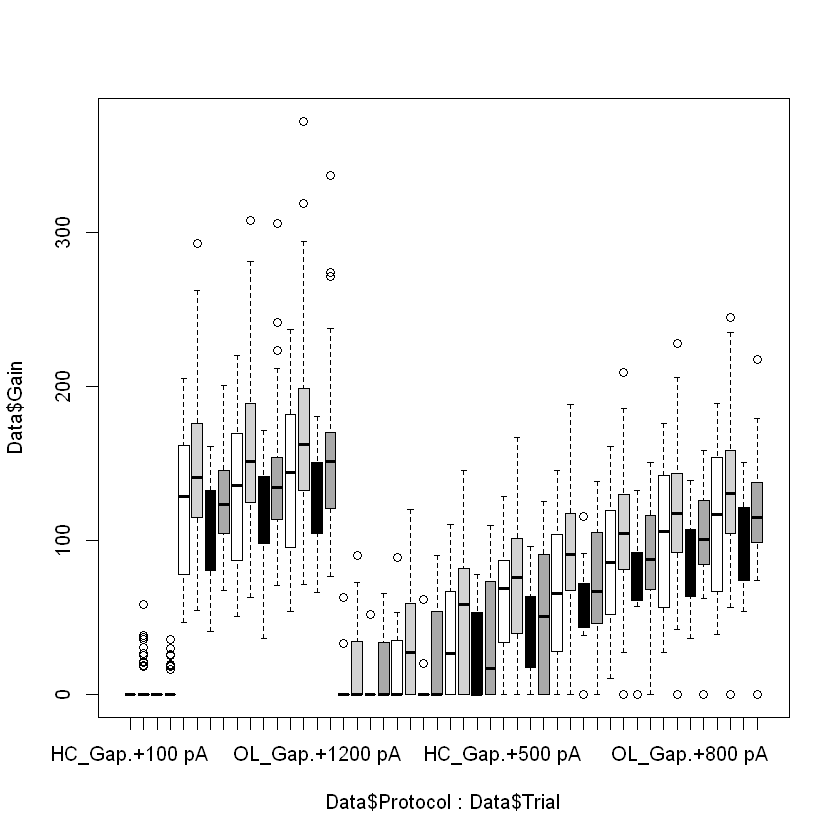

In [5]:
boxplot(Data$Gain~Data$Protocol*Data$Trial, 
        col = c("white", "lightgray","black", "darkgray"), Data)

In [6]:
Data$ProtoTri  <- interaction(Data$Protocol, Data$Trial)

In [7]:
head(Data)

,AnimalID,Protocol,Gain,Trial,ProtoTri
,<fct>,<fct>,<dbl>,<fct>,<fct>
1,150216_HC_YG_#01_tt,HC_Tonic,58.26657,+100 pA,HC_Tonic.+100 pA
2,150216_HC_YG_#02_tt,HC_Tonic,21.26528,+100 pA,HC_Tonic.+100 pA
3,150216_HC_YG_#03_tt,HC_Tonic,0.00000,+100 pA,HC_Tonic.+100 pA
4,150216_HC_YG_#05_tt,HC_Tonic,0.00000,+100 pA,HC_Tonic.+100 pA
5,150216_HC_YG_#06_tt,HC_Tonic,0.00000,+100 pA,HC_Tonic.+100 pA
6,150216_HC_YG_#09_tt,HC_Tonic,36.90037,+100 pA,HC_Tonic.+100 pA


In [9]:
LMM2.model  <- lme(Gain ~ Protocol, random = ~1|AnimalID, data=Data, na.action="na.omit")

In [10]:
av  <-  anova(LMM2.model)

In [44]:
LMM2.model

Linear mixed-effects model fit by REML
  Data: Data 
  Log-restricted-likelihood: -6741.149
  Fixed: Gain ~ Protocol + Trial + Protocol * Trial 
                   (Intercept)               ProtocolHC_Tonic 
                 -1.623659e-12                   6.367998e+00 
                ProtocolOL_Gap               ProtocolOL_Tonic 
                  4.305153e-13                   4.614265e+00 
                 Trial+1000 pA                  Trial+1100 pA 
                  1.221796e+02                   1.319620e+02 
                 Trial+1200 pA                   Trial+200 pA 
                  1.418932e+02                   7.420330e+00 
                  Trial+300 pA                   Trial+400 pA 
                  1.936306e+01                   3.567785e+01 
                  Trial+500 pA                   Trial+600 pA 
                  6.244068e+01                   6.794479e+01 
                  Trial+700 pA                   Trial+800 pA 
                  8.588022e+01      

In [11]:
av

,numDF,denDF,F-value,p-value
,<int>,<dbl>,<dbl>,<dbl>
(Intercept),1,1364,689.169278,0.0000000
Protocol,3,120,3.275965,0.0234902


In [12]:
comp.Protocol <- glht(LMM2.model, linfct=mcp(Protocol="Tukey"))

In [14]:
summary(comp.Protocol)


	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Tukey Contrasts


Fit: lme.formula(fixed = Gain ~ Protocol, data = Data, random = ~1 | 
    AnimalID, na.action = "na.omit")

Linear Hypotheses:
                         Estimate Std. Error z value Pr(>|z|)  
HC_Tonic - HC_Gap == 0     17.613     10.653   1.653   0.3372  
OL_Gap - HC_Gap == 0      -12.105     13.898  -0.871   0.8129  
OL_Tonic - HC_Gap == 0      3.554     11.050   0.322   0.9879  
OL_Gap - HC_Tonic == 0    -29.718     11.010  -2.699   0.0329 *
OL_Tonic - HC_Tonic == 0  -14.058      7.084  -1.985   0.1852  
OL_Tonic - OL_Gap == 0     15.660     11.394   1.374   0.5034  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
(Adjusted p values reported -- single-step method)


In [12]:
LMM1.null <- lmer(Gain ~ Protocol + Trial + (1|AnimalID), data=Data, REML = FALSE)

In [13]:
anova(LMM1.null, LMM1.model)

,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
LMM1.null,17,13818.41,13908.60,-6892.205,13784.41,NA,NA,NA
LMM1.model,50,13823.90,14089.16,-6861.950,13723.90,60.50985,33,0.002427007


In [14]:
coef(LMM1.model)

$AnimalID
                    (Intercept) ProtocolHC_Tonic ProtocolOL_Gap
150216_HC_YG_#01_tt  95.9279976         6.367998   8.790866e-11
150216_HC_YG_#02_tt  79.1247933         6.367998   8.790866e-11
150216_HC_YG_#03_tt  38.0926052         6.367998   8.790866e-11
150216_HC_YG_#04_tg   1.3870968         6.367998   8.790866e-11
150216_HC_YG_#05_tt  43.2991443         6.367998   8.790866e-11
150216_HC_YG_#06_tt -44.8353300         6.367998   8.790866e-11
150216_HC_YG_#09_tt  20.5383026         6.367998   8.790866e-11
150216_HC_YG_#10_tt  44.4847399         6.367998   8.790866e-11
150224_HC_YG_#01_tt -52.7245129         6.367998   8.790866e-11
150224_HC_YG_#02_tt  23.3301386         6.367998   8.790866e-11
150224_HC_YG_#03_tt   5.6997639         6.367998   8.790866e-11
150224_HC_YG_#04_tt  39.7122679         6.367998   8.790866e-11
150224_HC_YG_#05_tt  42.5350205         6.367998   8.790866e-11
150224_HC_YG_#06_tt  -9.3892683         6.367998   8.790866e-11
150224_HC_YG_#08_tt   3.808412